In [1]:
#Sequential API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

In [3]:
X_train = X_train / 255.
X_valid = X_valid / 255.

In [4]:
model = tf.keras.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [7]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='tb_callback_dir', histogram_freq=1)

In [8]:
model.compile(optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=32, validation_data = (X_train, y_train), epochs = 15, callbacks=[tb_callback])

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5540 - loss: 1.4501 - val_accuracy: 0.7956 - val_loss: 0.5426
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7841 - loss: 0.5766 - val_accuracy: 0.8304 - val_loss: 0.4664
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8046 - loss: 0.5241 - val_accuracy: 0.8318 - val_loss: 0.4412
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8233 - loss: 0.4716 - val_accuracy: 0.8340 - val_loss: 0.4347
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8553 - loss: 0.4200 - val_accuracy: 0.8646 - val_loss: 0.3951
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8483 - loss: 0.4259 - val_accuracy: 0.8410 - val_loss: 0.4855
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8506 - loss: 0.4363 - val_accuracy: 0.8626 - val_loss: 0.3893
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.4232 - val_accuracy: 0.

<Axes: >

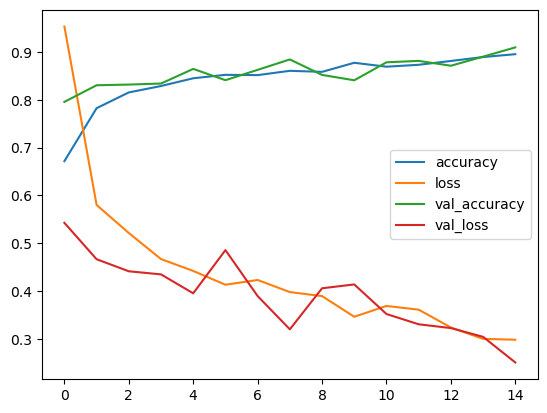

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot()